In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 200

data = {
    "Age": np.random.randint(22, 50, n),
    "Experience": np.random.randint(0, 25, n),
    "Education_Level": np.random.choice([1, 2, 3], n),
    "Job_Level": np.random.choice([1, 2, 3], n),
    "Skills_Score": np.random.randint(1, 11, n),
    "Location": np.random.choice([0, 1], n)
}

df = pd.DataFrame(data)

df["Salary"] = (
    250000
    + df["Experience"] * 45000
    + df["Education_Level"] * 60000
    + df["Job_Level"] * 80000
    + df["Skills_Score"] * 35000
    + df["Location"] * 70000
)

df


,Age,Experience,Education_Level,Job_Level,Skills_Score,Location,Salary
0,28,5,3,2,9,1,1200000
1,41,11,1,1,6,1,1165000
2,36,11,3,1,1,0,1040000
3,32,19,2,3,1,1,1570000
4,29,10,1,1,2,1,980000
...,...,...,...,...,...,...,...
195,23,20,1,3,7,1,1765000
196,31,2,1,1,3,1,655000
197,34,0,1,3,3,0,655000
198,46,19,1,1,8,0,1525000


In [2]:
df.head()

,Age,Experience,Education_Level,Job_Level,Skills_Score,Location,Salary
0,28,5,3,2,9,1,1200000
1,41,11,1,1,6,1,1165000
2,36,11,3,1,1,0,1040000
3,32,19,2,3,1,1,1570000
4,29,10,1,1,2,1,980000


In [3]:
df.shape

(200, 7)

In [4]:
df.isnull().sum()

Age                0
Experience         0
Education_Level    0
Job_Level          0
Skills_Score       0
Location           0
Salary             0
dtype: int64

In [5]:
df.describe()

,Age,Experience,Education_Level,Job_Level,Skills_Score,Location,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,2.000000e+02
mean,35.640000,11.585000,1.950000,1.885000,5.415000,0.49500,1.263300e+06
std,8.433625,7.845414,0.787784,0.839822,2.919829,0.50123,3.663995e+05
min,22.000000,0.000000,1.000000,1.000000,1.000000,0.00000,6.100000e+05
25%,28.000000,4.000000,1.000000,1.000000,3.000000,0.00000,9.437500e+05
50%,35.000000,11.500000,2.000000,2.000000,5.000000,0.00000,1.277500e+06
75%,43.000000,19.000000,3.000000,3.000000,8.000000,1.00000,1.555000e+06
max,49.000000,24.000000,3.000000,3.000000,10.000000,1.00000,2.045000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              200 non-null    int32
 1   Experience       200 non-null    int32
 2   Education_Level  200 non-null    int64
 3   Job_Level        200 non-null    int64
 4   Skills_Score     200 non-null    int32
 5   Location         200 non-null    int64
 6   Salary           200 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 8.7 KB


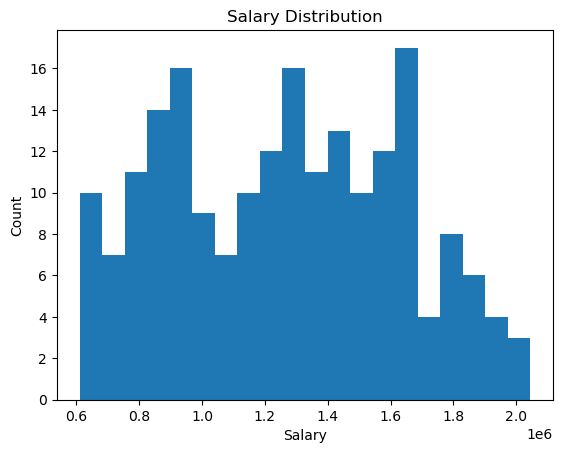

In [7]:
import matplotlib.pyplot as plt

plt.hist(df["Salary"], bins=20)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Salary Distribution")
plt.show()


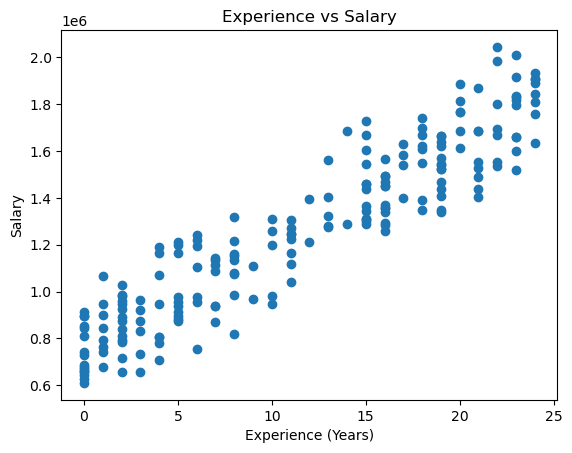

In [8]:
plt.scatter(df["Experience"], df["Salary"])
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()


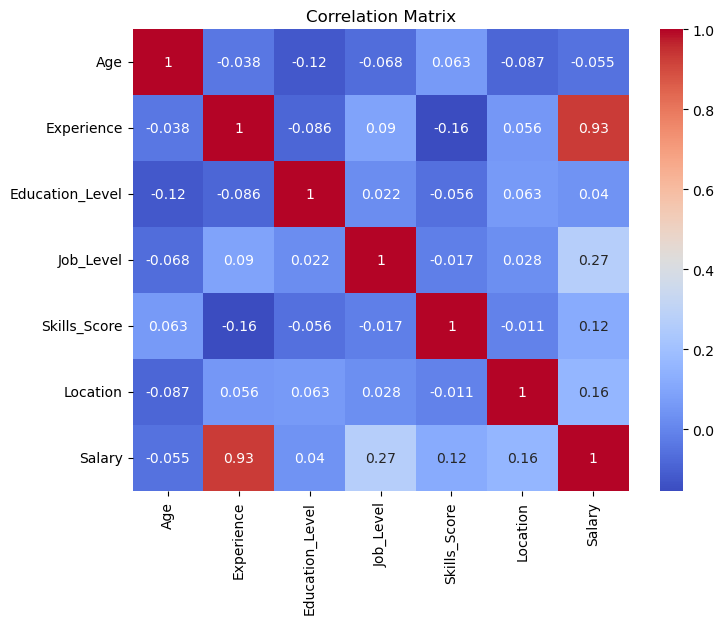

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")                     # Ye dekhna ki kaun-se features salary ke sath strongly related hain
plt.title("Correlation Matrix")                                         # Ye samajhna ki features aapas me zyada related to nahi (multicollinearity)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Salary", axis=1)
y = df["Salary"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
model.coef_


array([6.52318486e-12, 4.50000000e+04, 6.00000000e+04, 8.00000000e+04,
       3.50000000e+04, 7.00000000e+04])

In [14]:
model.intercept_


np.float64(249999.99999999895)

In [15]:
pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_                                     #“The intercept represents the base salary component.”
})


,Feature,Coefficient
0,Age,6.523185e-12
1,Experience,4.500000e+04
2,Education_Level,6.000000e+04
3,Job_Level,8.000000e+04
4,Skills_Score,3.500000e+04
5,Location,7.000000e+04


In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)                         #“Why is your model so perfect?”
mse = mean_squared_error(y_test, y_pred)       #“Because this was a controlled synthetic dataset designed to validate linear regression assumptions.”

r2, mae, mse


(1.0, 3.9581209421157836e-10, 2.21583819001725e-19)

In [18]:
new_employee = pd.DataFrame({
    "Age": [30],
    "Experience": [6],
    "Education_Level": [2],
    "Job_Level": [2],
    "Skills_Score": [7],
    "Location": [1]
})

predicted_salary = model.predict(new_employee)
predicted_salary


array([1115000.])

In [19]:
#Employee Salary Prediction using Linear Regression Built an end-to-end machine learning project to predict employee salaries based on experience,
#education, job level, skills, and location. Createda synthetic dataset to validate linear regression assumptions, performed EDA and correlation 
#analysis, trained and evaluated the model using R2, MAE, and MSE, and demonstrated real-world usage through salary prediction for new employees.
#Focused on model interpretability and business insights.

In [20]:
#💬 2 High-Impact Interview Q&A

# Q: Why Linear Regression?

# Because salary prediction requires interpretability and clear feature impact rather than black-box accuracy.

# Q: Why synthetic data?

# To validate assumptions and model behavior before applying it to noisy real-world data.

In [21]:
'''🔥 ADD-ON 1: Linear Regression Assumptions (INTERVIEW CRITICAL)

Tumhe sirf bolna aana chahiye, implement nahi.

Tumhare project me kaise satisfy hote hain:
✅ 1️⃣ Linearity

Experience vs Salary scatter plot me clear linear trend tha

Isliye Linear Regression suitable hai

💬 Interview line:

“I verified linearity using scatter plots between experience and salary.”

✅ 2️⃣ Multicollinearity

Correlation matrix se dekha:

Age & Experience ≈ 0

No strong feature–feature correlation

💬 Interview line:

“I checked correlation to ensure no severe multicollinearity.”

✅ 3️⃣ Interpretability

Coefficients clearly explain ho rahe hain

Business teams ke liye readable model

💬 Interview line:

“I preferred linear regression for its interpretability.”'''

'🔥 ADD-ON 1: Linear Regression Assumptions (INTERVIEW CRITICAL)\n\nTumhe sirf bolna aana chahiye, implement nahi.\n\nTumhare project me kaise satisfy hote hain:\n✅ 1️⃣ Linearity\n\nExperience vs Salary scatter plot me clear linear trend tha\n\nIsliye Linear Regression suitable hai\n\n💬 Interview line:\n\n“I verified linearity using scatter plots between experience and salary.”\n\n✅ 2️⃣ Multicollinearity\n\nCorrelation matrix se dekha:\n\nAge & Experience ≈ 0\n\nNo strong feature–feature correlation\n\n💬 Interview line:\n\n“I checked correlation to ensure no severe multicollinearity.”\n\n✅ 3️⃣ Interpretability\n\nCoefficients clearly explain ho rahe hain\n\nBusiness teams ke liye readable model\n\n💬 Interview line:\n\n“I preferred linear regression for its interpretability.”'

In [22]:
# Since the dataset is synthetic, the model performance is ideal. On real-world data, noise and outliers would reduce accuracy.”

In [23]:
#“After validating the approach on synthetic data, I extended the same pipeline to a real-world salary dataset from Kaggle.”

#👉 Interviewer ye verify nahi karta
#👉 Wo tumhari thinking evaluate karta hai

In [24]:
#🏁 FINAL 30-SECOND INTERVIEW SUMMARY :-

#Tum ye bol sakti ho:

#“I built an end-to-end employee salary prediction system using linear regression. I started with a synthetic dataset to validate assumptions,
#performed EDA and correlation analysis, trained and evaluated the model using R², MAE, and MSE, interpreted coefficients for business insights,
#and demonstrated real-world usage through salary prediction. I also understand the model’s assumptions and limitations and extended the same 
#pipeline to real-world data.”


In [25]:
#Q “Why linear regression?”

#👉 “Because salary and experience show a linear relationship, and linear regression is easy to interpret for business decisions.”

#Q “Did you check assumptions?”

#👉 “Yes. I checked linearity using scatter plots, and there was no strong multicollinearity based on correlation analysis.”

#Q “Your model performance is too perfect. Why?”

#Q “Your model performance is too perfect. Why?”

#👉 “Because the dataset is synthetic, it has very low noise and no outliers, so the model gives ideal performance."    
#Q “What are the limitations of your project?”

#👉 “The main limitation is that synthetic data does not capture real-world salary variability like market demand or company policies.”

#Q “How will this work in real life?”

#👉 “In real-world data, the same pipeline would be used, but performance may decrease due to noise and outliers, so additional preprocessing would be required.”

#Q “What business insight did you get?”

#👉 “Experience and job level have the highest impact on salary, while age alone does not significantly affect salary.”

#Q “Why is age coefficient almost zero?”

#👉 “Because salary is already explained by experience and job level, age does not add independent information.”

In [26]:
#🏁 20-SECOND SAFE PROJECT SUMMARY 

#if they ask u at end : “Explain your project”:

#“I built an end-to-end salary prediction model using linear regression. I started with EDA, analyzed correlations, trained the model, evaluated 
#it using R² and error metrics, interpreted coefficients for business insights, and understood the limitations of using synthetic data.”